In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
import qiskit as qkit
import qiskit.visualization as qvis

In [72]:
import qiskit.providers.aer.noise as qnoise

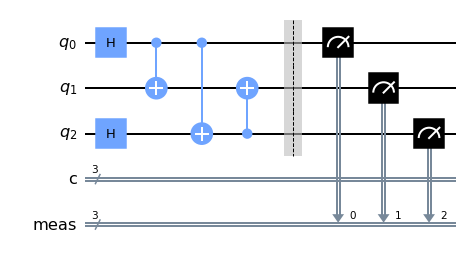

In [90]:
# prepare a qucntum circuit
qcirc = qkit.QuantumCircuit(3,3)

# add Hadamard gates
qcirc.h([0,2])

# add CNOTs
qcirc.cx(0,1)
qcirc.cx(0,2)
qcirc.cx(2,1)

# final measurement
qcirc.measure_all()

# see what is happening
qcirc.draw(output='mpl')

In [112]:
# define noise model
noise_model = qnoise.NoiseModel()

# define errors for quantum gates
# error probabilities
pe1 = 0.001  # for 1-qubit gates
pe2 = 0.05  # for 2-qubit gates

# error defnitions
one_qubit_error = qnoise.depolarizing_error(pe1, 1)
two_qubit_error = qnoise.depolarizing_error(pe2, 2)

# add errors to the model
noise_model.add_all_qubit_quantum_error(one_qubit_error, ['h'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

In [113]:
# define the backend used to run the circuit
simulator = qkit.Aer.get_backend('qasm_simulator')

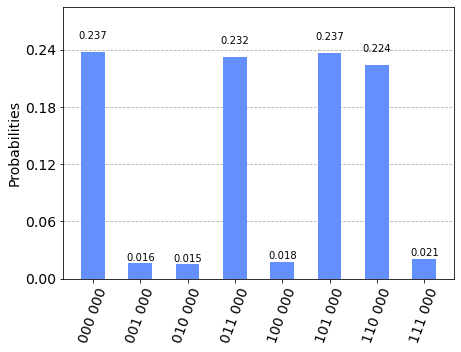

In [114]:
# run the curcuit
result = qkit.execute(qcirc, simulator, noise_model = noise_model, shots=2048).result()
counts = result.get_counts(0)
qvis.plot_histogram(counts)